In [2]:
import ipywidgets as widgets
import time
#from IPython.display import display
from IPython.display import display, Javascript
import pandas as pd
import datetime;
import numpy as np
import random

In [21]:
#df = read_csv('')
df = pd.DataFrame(columns=['seconds','Qtype','Option','Correct','From','QNo','Date'])
df.head()

,seconds,Qtype,Option,Correct,From,QNo,Date


In [43]:
Text=widgets.Text(
    value='Enter text',
    
    disabled=False
)
display(Text)

Text(value='Enter text')

In [41]:
def insert(df,seconds,Qtype,Option,Correct,From,Qno):
    
    df.loc[-1] = createVal(seconds,Qtype,Option,Correct,From,Qno)
    print("Value added")
    display(df.loc[-1])
    df= df.reset_index(drop=True)
    
    save(df,'Data.csv')
    return df
    #return 1
    
def createVal(seconds,Qtype,Option,Correct,From,Qno):
    #adds todays date
    date = datetime.datetime.now()
    
    return [seconds,Qtype,Option,Correct,From,Qno,date]

def correct(df,column,loc,value):
    df[column].loc[loc] = value
def save(df,name):
    df.to_csv(name,index=False)

In [45]:
df
play = widgets.Play(
    value=0,
    min=0,
    max=1000,
    step=1,
    interval=1000,
    description="Timer",
    disabled=False
)
slider = widgets.IntSlider(min=0,max=1000)
widgets.jslink((play, 'value'), (slider, 'value'))

display(widgets.HBox([play, slider]))

Q_type=widgets.RadioButtons(
    options=['IR', 'Verbal', 'Quant'],
#    value='pineapple', # Defaults to 'pineapple'
#    layout={'width': 'max-content'}, # If the items' names are long
    description='Qtype:',
    disabled=False
)
display(Q_type)
Option_Selected =widgets.RadioButtons(
    options=['A', 'B', 'C','D','E'],
#    value='pineapple', # Defaults to 'pineapple'
#    layout={'width': 'max-content'}, # If the items' names are long
    description='Options:',
    disabled=False
)
display(Option_Selected)
Correct = widgets.RadioButtons(
    options=['A', 'B', 'C','D','E'],
#    value='pineapple', # Defaults to 'pineapple'
    layout={'width': 'max-content'}, # If the items' names are long
    description='Correct:',
    disabled=False
)
display(Correct)
From = widgets.Text(
    value='GMAT_StudyGuide',
    placeholder='Paste ticket description here!',
    description='From:',
    disabled=False
)
QNo=widgets.Text(
    value='Chp_',
    placeholder='Paste ticket description here!',
    description='Question Number',
    disabled=False
)
display(From,QNo)
Button = widgets.Button(
    description='Insert',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Click to add to dataframe',
    #icon='check' # (FontAwesome names without the `fa-` prefix)
)
def i(b):
    insert(df,slider.value,Q_type.value,Option_Selected.value,Correct.value,From.value,QNo.value)
    
Button.on_click(i)
display(Button)
#df= df.reset_index(drop=True)
print(slider.value)

RadioButtons(description='Qtype:', options=('IR', 'Verbal', 'Quant'), value='IR')

RadioButtons(description='Options:', options=('A', 'B', 'C', 'D', 'E'), value='A')

RadioButtons(description='Correct:', layout=Layout(width='max-content'), options=('A', 'B', 'C', 'D', 'E'), va…

Text(value='GMAT_StudyGuide', description='From:', placeholder='Paste ticket description here!')

Text(value='Chp_', description='Question Number', placeholder='Paste ticket description here!')

Button(description='Insert', style=ButtonStyle(), tooltip='Click to add to dataframe')

0


In [46]:
print(slider.value)

155


In [40]:
df

,seconds,Qtype,Option,Correct,From,QNo,Date
0,0,IR,A,A,GMAT_StudyGuide,Chp_,2020-10-17 14:37:22.535691
1,0,IR,A,A,GMAT_StudyGuide,Chp_,2020-10-17 14:38:37.638425
-1,0,IR,A,A,GMAT_StudyGuide,Chp_,2020-10-17 14:38:58.282125


In [45]:
data =pd.DataFrame(columns=)
data.loc[-1]=createVal(slider.value,'IR',True,'GMAT','GMAT_StudyGuide')
data = data.reset_index(drop=True)
data.head()
data.loc[-1]=createVal(slider.value,'IR',True,'GMAT','A',generateFrom(True,Q(7,10)))
data = data.reset_index(drop=True)
data.head()

,seconds,Qtype,isCorrect,Testtype,From,Date
0,19,IR,True,GMAT,GMAT_StudyGuide,2020-10-16 15:42:32.365946
1,19,IR,True,GMAT,GMAT_StudyGuide,2020-10-16 15:42:32.375510


In [50]:
#data['seconds'].loc[0]=999

C:\Users\Arslan Shahid\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [56]:
correct(data,'seconds',0,60)
data.head()

,seconds,Qtype,isCorrect,Testtype,From,Date
0,60,IR,True,GMAT,GMAT_StudyGuide,2020-10-16 15:42:32.365946
1,19,IR,True,GMAT,GMAT_StudyGuide,2020-10-16 15:42:32.375510


In [118]:
from datetime import timedelta
seconds_list = [np.random.randint(50,300) for i in range(100)]
listtype =['IR','Verbal','Quant']
Qtype = [listtype[i%3] for i in range(100)]
Testtype = ['GMAT' for i in range(100)]
From = ['GMAT_StudyGuide...' for i in range(100)]
Answertype =['A','B','C','D','E']
Option = [Answertype[i%5] for i in range(100)]
CorrectType = [True,False]
isCorrect= [CorrectType[i%2] for i in range(100)]
CorrectAnswer =[Option[i] for i in range(50)]
Answers =['B','C','D','A','E']
Biaslist = [Answers[i%5] for i in range(50)]
for a in Biaslist:
    CorrectAnswer.append(a)
Date = [datetime.datetime.now()+timedelta(days=np.floor(i/10),minutes=i*3) for i in range(100)]


In [121]:
data= pd.DataFrame()
data['seconds'] = seconds_list
data['Qtype'] = Qtype
#data['Testtype'] = Testtype
data['From'] = From
data['Option'] = Option
data['CorrectAnswer'] = CorrectAnswer
data['Date'] = Date
data.head()

,seconds,Qtype,From,Option,CorrectAnswer,Date
0,97,IR,GMAT_StudyGuide...,A,A,2020-10-17 17:20:40.850271
1,286,Verbal,GMAT_StudyGuide...,B,B,2020-10-17 17:23:40.850271
2,62,Quant,GMAT_StudyGuide...,C,C,2020-10-17 17:26:40.850271
3,211,IR,GMAT_StudyGuide...,D,D,2020-10-17 17:29:40.850271
4,120,Verbal,GMAT_StudyGuide...,E,E,2020-10-17 17:32:40.850271


In [122]:
data['isCorrect'] = [True if i['Option']==i['CorrectAnswer'] else False for index,i in data.iterrows()]

In [123]:
d=data.groupby('Qtype')

In [124]:
data['week'] = [i.strftime("%V") for i in data['Date']]
data

,seconds,Qtype,From,Option,CorrectAnswer,Date,isCorrect,week
0,97,IR,GMAT_StudyGuide...,A,A,2020-10-17 17:20:40.850271,True,42
1,286,Verbal,GMAT_StudyGuide...,B,B,2020-10-17 17:23:40.850271,True,42
2,62,Quant,GMAT_StudyGuide...,C,C,2020-10-17 17:26:40.850271,True,42
3,211,IR,GMAT_StudyGuide...,D,D,2020-10-17 17:29:40.850271,True,42
4,120,Verbal,GMAT_StudyGuide...,E,E,2020-10-17 17:32:40.850271,True,42
...,...,...,...,...,...,...,...,...
95,125,Quant,GMAT_StudyGuide...,A,B,2020-10-26 22:05:40.850271,False,44
96,120,IR,GMAT_StudyGuide...,B,C,2020-10-26 22:08:40.850271,False,44
97,94,Verbal,GMAT_StudyGuide...,C,D,2020-10-26 22:11:40.850271,False,44
98,62,Quant,GMAT_StudyGuide...,D,A,2020-10-26 22:14:40.850271,False,44


In [113]:
d=data.groupby(['week','Qtype']).mean()
d= pd.DataFrame(d)
d.reset_index(inplace=True)
d

,week,Qtype,seconds,isCorrect
0,42,IR,182.571429,1.000000
1,42,Quant,218.333333,1.000000
2,42,Verbal,171.857143,1.000000
3,43,IR,172.391304,0.565217
4,43,Quant,166.791667,0.541667
5,43,Verbal,163.173913,0.521739
6,44,IR,219.500000,0.250000
7,44,Quant,225.333333,0.000000
8,44,Verbal,209.333333,0.333333


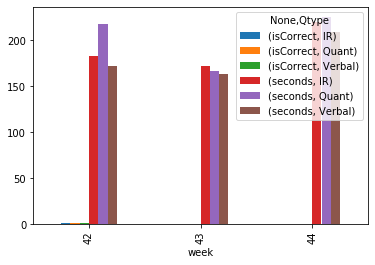

In [114]:
d = d.pivot(index='week', columns='Qtype', values=['seconds'])
d.plot(kind='bar')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000023136216048>],
      dtype=object)

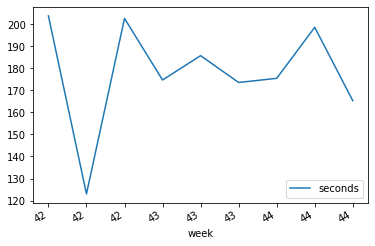

In [99]:
d.plot(x='week',y='seconds',kind='line',subplots=True)

In [132]:
data.groupby(['week','isCorrect','Qtype']).describe()

seconds                                                \
                        count        mean         std    min     25%    50%   
week isCorrect Qtype                                                          
42   True      IR         7.0  146.857143   36.292463   97.0  129.00  149.0   
               Quant      6.0  198.166667   87.497238   62.0  147.75  225.0   
               Verbal     7.0  193.142857   71.648281  120.0  136.50  182.0   
43   False     IR        10.0  175.700000   83.826607   61.0   94.00  191.0   
               Quant     11.0  151.272727   71.361181   52.0   87.00  161.0   
               Verbal    11.0  142.272727   43.886424   84.0  107.50  141.0   
     True      IR        13.0  183.153846   73.825070   76.0  132.00  165.0   
               Quant     13.0  194.538462   87.265510   54.0  134.00  205.0   
               Verbal    12.0  207.166667   48.186821  107.0  189.50  211.5   
44   False     IR         3.0   91.333333   32.516662   56.0   77.00   98.0   
               Quant      3.0  162.000000  122.755855   62.0   93.50  125.0   
               Verbal     2.0  139.500000   64.346717   94.0  116.75  139.5   
     True      IR         1.0  109.000000         NaN  109.0  109.00  109.0   
               Verbal     1.0  243.000000         NaN  243.0  243.00  243.0   

                                      
                          75%    max  
week isCorrect Qtype                  
42   True      IR      156.50  211.0  
               Quant   250.50  296.0  
               Verbal  242.50  292.0  
43   False     IR      251.00  282.0  
               Quant   180.50  280.0  
               Verbal  160.00  230.0  
     True      IR      238.00  296.0  
               Quant   277.00  293.0  
               Verbal  229.75  287.0  
44   False     IR      109.00  120.0  
               Quant   212.00  299.0  
               Verbal  162.25  185.0  
     True      IR      109.00  109.0  
               Verbal  243.00  243.0